In [46]:
import pandas as pd

df=pd.read_csv('../data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [47]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


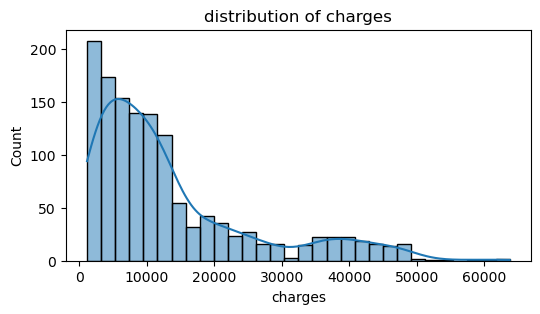

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,3))
sns.histplot(df['charges'],kde=True)
plt.title('distribution of charges')
plt.show()

In [49]:
df.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [17]:
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [50]:
cols = ['sex', 'smoker', 'region']
for i in cols:
    print(f"{i}: {df[i].value_counts()}")

sex: sex
male      676
female    662
Name: count, dtype: int64
smoker: smoker
no     1064
yes     274
Name: count, dtype: int64
region: region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [51]:
from sklearn.preprocessing import LabelEncoder

la=LabelEncoder()
df['sex']=la.fit_transform(df['sex'])
df['smoker']=la.fit_transform(df['smoker'])

In [52]:
df = pd.get_dummies(df, columns=['region'], drop_first=True)

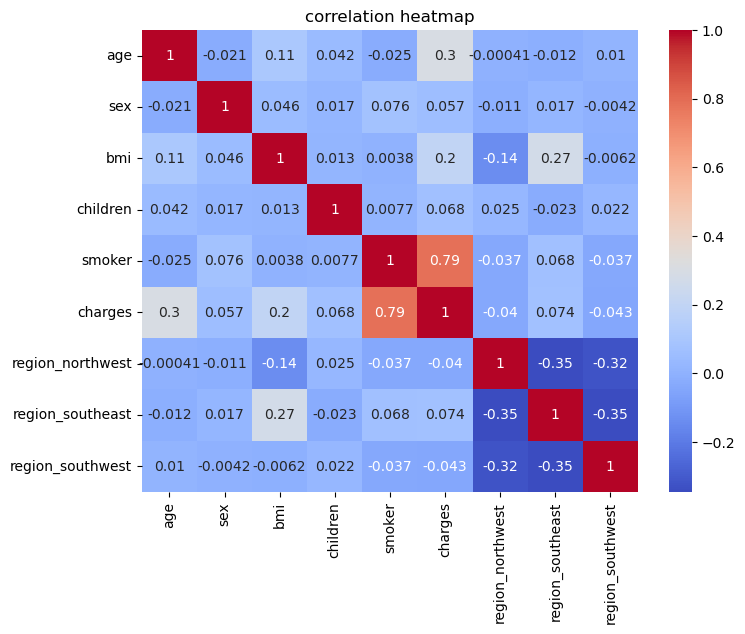

In [56]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.title('correlation heatmap')
plt.show()